In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the csv file
data = pd.read_csv("nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data["passenger_count"].value_counts(10)

1    0.709447
2    0.144102
5    0.053373
3    0.040712
6    0.033054
4    0.019264
0    0.000045
7    0.000001
9    0.000001
Name: passenger_count, dtype: float64

In [6]:
data = data.loc[~(data['passenger_count'] == 0)]
data = data.loc[~(data['passenger_count'] == 7)]
data = data.loc[~(data['passenger_count'] == 9)]


In [8]:
data['trip_duration_hour'] = data['trip_duration'].apply(lambda x: x/3600)
data.drop(columns=['trip_duration'], inplace=True)

In [9]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [ ]:
# K-NEAREST NEIGHBOURS MODEL

In [10]:
custom_data=data.sample(100000)

In [12]:
sample_data=custom_data 

In [13]:
#Creating independent and dependent variables
a = sample_data.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
b = sample_data["trip_duration_hour"]

In [14]:
sample_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [16]:
#Converting the store and fwd flag to int type
sample_data["store_and_fwd_flag"].value_counts()

N    99438
Y      562
Name: store_and_fwd_flag, dtype: int64

In [17]:
df1 = pd.concat([sample_data, pd.get_dummies(sample_data[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
70003,-73.870544,40.733887,-73.921608,40.737782,0,0,1,0,0,0
37554,-73.966125,40.758549,-73.978600,40.754837,0,1,0,0,0,0
406110,-73.994759,40.721264,-73.967972,40.793957,0,0,0,0,1,0
727682,-73.975861,40.754253,-73.979607,40.766972,0,1,0,0,0,0
342920,-73.982788,40.751450,-73.952263,40.771221,0,1,0,0,0,0


In [18]:
#Seperate features and target
x = df1
y = sample_data["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [19]:
#Scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [20]:
#Creating dataframe
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.732446,0.607907,0.341378,0.415953,0.0,0.0,1.0,0.0,0.0,0.0
1,0.681263,0.626396,0.311361,0.433067,0.0,1.0,0.0,0.0,0.0,0.0
2,0.665930,0.598444,0.316958,0.472321,0.0,0.0,0.0,0.0,1.0,0.0
3,0.676050,0.623176,0.310830,0.445244,0.0,1.0,0.0,0.0,0.0,0.0
4,0.672340,0.621074,0.325232,0.449508,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
#Scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.732446,0.607907,0.341378,0.415953,0.0,0.0,1.0,0.0,0.0,0.0
1,0.681263,0.626396,0.311361,0.433067,0.0,1.0,0.0,0.0,0.0,0.0
2,0.665930,0.598444,0.316958,0.472321,0.0,0.0,0.0,0.0,1.0,0.0
3,0.676050,0.623176,0.310830,0.445244,0.0,1.0,0.0,0.0,0.0,0.0
4,0.672340,0.621074,0.325232,0.449508,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
#Importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [24]:
#Importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [25]:
#Creating instance of KNN
reg = KNN(n_neighbors = 10)
#Fitting the model
reg.fit(train_x,train_y)
#Predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9111059027967666


In [ ]:
#Finding the value of k using elbow method

In [30]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [29]:
k = range(1,50)

In [28]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

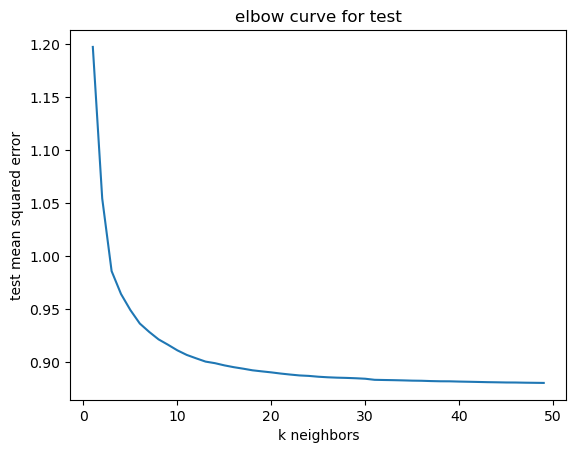

In [31]:
#Plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [41]:
#Creating instance of KNN
reg = KNN(n_neighbors =5)
#Fitting the model
reg.fit(train_x,train_y)
#Predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9491402996376104


In [ ]:
The best value of k is 10

In [33]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

23.53389524192241

In [34]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-15.1667590770876

In [37]:
#Storing the value of train score which can be used later
%store knn_test_score

Stored 'knn_test_score' (float64)


In [38]:
#Storing the value of test score which can be used later
%store knn_train_score

Stored 'knn_train_score' (float64)


In [ ]:
# Conclusions
1. The Test RMSE is 0.9111 when we took the value of k as 10

2. We used Elbow method in order to determine the value of k 

3. On using Elbow method we found that at k = 10 the test RMSE is 0.9111 which is lesser than the RMSE at K=5 (0.9491)

4. The train score is 23.5338

5. The test score is -15.1667 which is not pereferd

In [107]:
custom_d=sample_data

In [45]:
sample_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [47]:
#Seperate features and target
features = sample_data.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime"],axis = 1)
target = sample_data["trip_duration_hour"]

In [48]:
df1 = pd.concat([sample_data, pd.get_dummies(sample_data[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
70003,-73.870544,40.733887,-73.921608,40.737782,0,0,1,0,0,0
37554,-73.966125,40.758549,-73.978600,40.754837,0,1,0,0,0,0
406110,-73.994759,40.721264,-73.967972,40.793957,0,0,0,0,1,0
727682,-73.975861,40.754253,-73.979607,40.766972,0,1,0,0,0,0
342920,-73.982788,40.751450,-73.952263,40.771221,0,1,0,0,0,0


In [49]:
df1.shape

(100000, 10)

In [51]:
#Seperate features and target
x = df1
y = sample_data["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [52]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [ ]:
Linear Regression model

In [53]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [54]:
#Creating an instance of LR
lr = LR()
#Fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [56]:
#Predicting the train values and finding the train RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("Train rmse ",k)

Train rmse  0.8201563970859729


In [58]:
#Predicting the test values and finding the test RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("Test rmse ",k)

Test rmse  0.8805221215560315


In [59]:
#Computing the coefficients for above model
lr.coef_

array([ 1.26309882e+00, -1.04103566e+00,  9.07529217e-01, -9.20905949e-01,
        7.90806833e+11,  7.90806833e+11,  7.90806833e+11,  7.90806833e+11,
        7.90806833e+11,  7.90806833e+11])

In [ ]:
# Plotting the coefficients

Text(0.5, 1.0, 'Coefficient Plot')

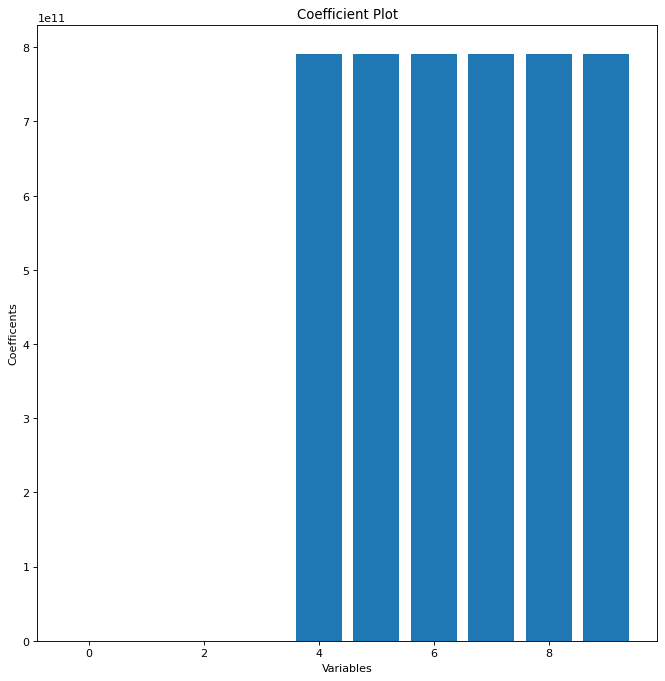

In [69]:
plt.figure(figsize=(10,10),dpi=80,facecolor="w")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficents")
plt.title("Coefficient Plot")

In [70]:
#Here we can see that the model is dependent upon some Independent variables too much so these coefficients are not suitable for interpretation as they are not scaled.

In [71]:
#Calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
549944,0.163333,0.263672,-0.100339
197434,0.225556,0.233521,-0.007965
544340,0.097222,0.244263,-0.147040
371703,0.068889,0.161377,-0.092488
576121,0.183056,0.194946,-0.011891


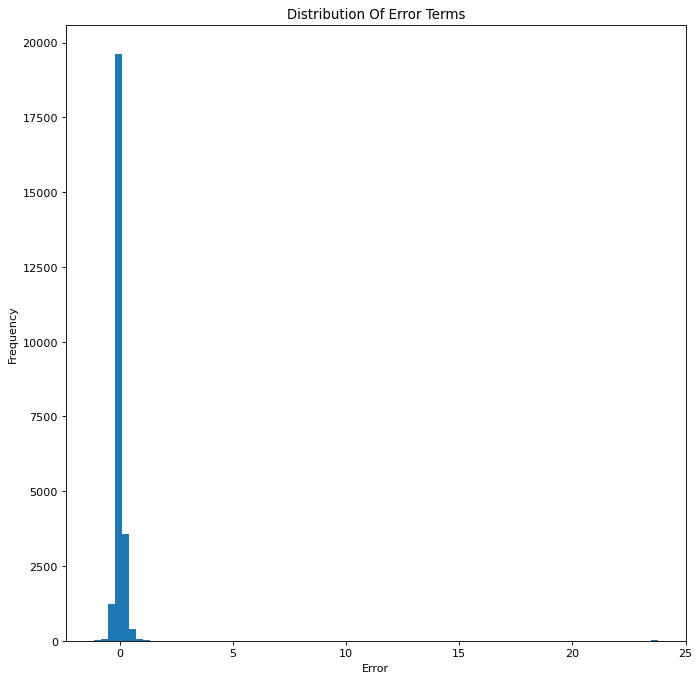

In [77]:
plt.figure(figsize=(10,10),dpi=80,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=80)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution Of Error Terms")
plt.show()

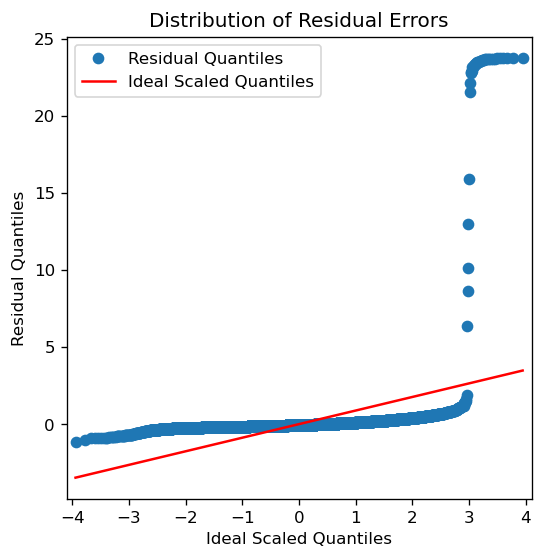

In [78]:
# Importing the QQ-plot from the statsmodels.
from statsmodels.graphics.gofplots import qqplot

# Plotting the QQ plot.
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [79]:
#Calculating the train score 
linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

1.0163708888708989

In [80]:
#calculating the test score
linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.8832938698874027

In [83]:
#storing the value of test score which can be used later.
%store linear_test_score

Stored 'linear_test_score' (float64)


In [84]:
#storing the value of train score which can be used later.
%store linear_train_score

Stored 'linear_train_score' (float64)


In [ ]:
# Conclusions
1. The train and test RMSE has a huge difference as the train rmse is 0.82015 and testing rmse is 0.88052. 

2. On computing the coefficients we observed that there are some negative values as well.

3. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles.

4. The train score of linear model is 1.01637.

5. The test score of linear model is 0.88329.

In [85]:
sample_data.dtypes.shape

(11,)

In [86]:
df1 = pd.concat([sample_data, pd.get_dummies(sample_data[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_hour,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
70003,-73.870544,40.733887,-73.921608,40.737782,0.233889,0,0,1,0,0,0
37554,-73.966125,40.758549,-73.978600,40.754837,0.253889,0,1,0,0,0,0
406110,-73.994759,40.721264,-73.967972,40.793957,0.524722,0,0,0,0,1,0
727682,-73.975861,40.754253,-73.979607,40.766972,0.116389,0,1,0,0,0,0
342920,-73.982788,40.751450,-73.952263,40.771221,0.179444,0,1,0,0,0,0


In [87]:
x = df1.drop(["trip_duration_hour"],axis = 1)
y = df1["trip_duration_hour"]

In [89]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [ ]:
#Decision Tree model

In [90]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [91]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.0005685032872854132


In [92]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  0.0012294288797528592


In [ ]:
#Interpreting the variable importance.

In [94]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6'],
      dtype='object')

In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


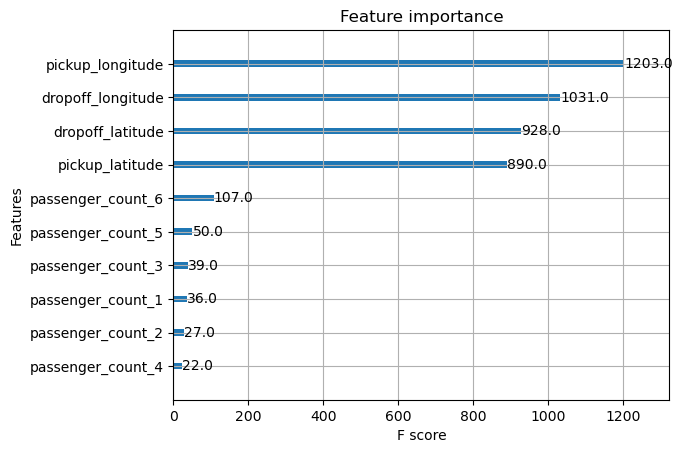

In [96]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

In [ ]:
#From the above graph we can infer that the varaible "pickup_longitude" has more impact on the trip duration variable followed by "dropoff_longitude" then "dropoff_latitude" and "pickup_latitude".

In [97]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

99.9999524406424

In [98]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

99.9998067706292

In [99]:
#storing the test score to use it in other file
%store decision_test_score

Stored 'decision_test_score' (float64)


In [100]:
#storing the train score to use it in other file
%store decision_train_score

Stored 'decision_train_score' (float64)


In [ ]:
Conclusion

*The train score and test score is 99.99 so we can consider that decision tree is the best model for predicting the trip duration variable.

In [ ]:
Bar Plot

In [101]:
decision_train_score,linear_train_score,knn_train_score

(0.999999524406424, 0.010163708888708989, 0.2353389524192241)

In [102]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[0.999999524406424, 0.010163708888708989, 0.2353389524192241]

In [103]:
knn_test_score, linear_test_score,decision_test_score

(-0.151667590770876, 0.008832938698874027, 0.9999980677062921)

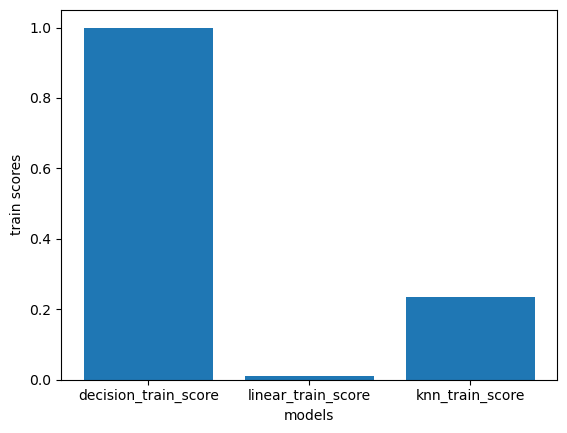

In [104]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [105]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","decision_test_score"]
y1=[-0.151667590770876, 0.008832938698874027, 0.9999980677062921]

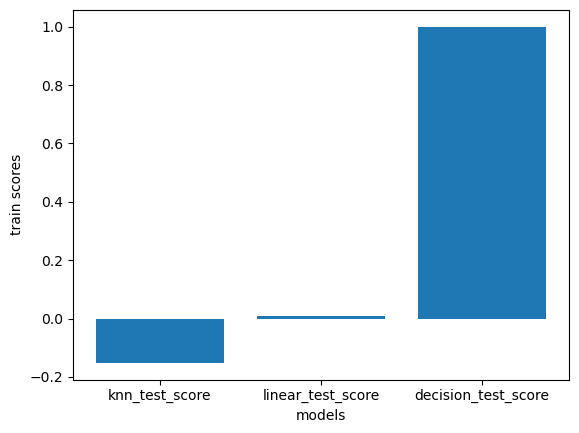

In [106]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [ ]:
# From above graph we can conclude that the best model among KNN Liner Rigression(LR) and Decision Tree(DT) the best one is Decision Tree in train score